In [171]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [488]:
def misclassified(trainSet, labelSet, w):
    predictedLabel = np.sign(np.dot(trainSet, np.transpose(w)))
    predictedResult = [a == b for a,b in zip(predictedLabel, labelSet)]
    misclassifiedIndex = [index for index, value in enumerate(predictedResult) if value == False]
    return misclassifiedIndex

In [494]:
def PLA(training_set,maxIteration):
    df = training_set.copy()
    
    #add x_0 = 1, the bias 
    df['bias'] = [1] * training_set.shape[0]
    col_list = [df.columns[-1]] 
    col_list.extend(df.columns.tolist()[:-2])
    col_list.append(df.columns.tolist()[-2])
    
    df = df[col_list]
    
    pointSet = np.array(df.iloc[:,:-1])
    labelSet = np.array(df.iloc[:,-1])
    
    errors = []
    
    n = len(pointSet[0])
    w = np.zeros([1,n]) 
    counter = 0
    
    for i in xrange(maxIteration):
        misclassifiedIndex = misclassified(pointSet, labelSet, w)
        errors.append(len(misclassifiedIndex)/float(training_set.shape[0]))
        #print misclassifiedIndex
        if misclassifiedIndex: 
            theChosenOne = random.choice(misclassifiedIndex)
            point = pointSet[theChosenOne].reshape(1,n)
            label = labelSet[theChosenOne].reshape(1,1)
            #if np.sign(np.dot(point, np.transpose(w))) != label:
            #print label
            #print point
            #print w, label*point
            w = w + label*point
            counter += 1 
            #print len(misclassifiedIndex)/float(training_set.shape[0])
            #df.plot(kind='scatter',x='x',y='y', c='Value')
            #l = np.arange(-1,9)
            #ymin, ymax = plt.ylim()
            #a = -w[0][0]/w[0][1]
            #xx = np.linspace(-1,7)
            #xx = np.linspace(ymin,ymax).reshape(50,1)
            #yy = a*xx - w[0][1]/w[0][1]
            #print xx.shape
            #print yy.shape
            #plt.plot(yy,xx, 'k-')
            #plt.plot(point[0][0],point[0][1],'ro')
            #plt.show()
        else: 
            break
       
    predictedLabel = np.sign(np.dot(pointSet, np.transpose(w)))
    E_in = sum([a!=b for a,b in zip(predictedLabel, labelSet)])/float(len(predictedLabel))
    
    #for predict, real in zip(predictedLabel, labelSet):
        #print predict,real
    
    return E_in, counter, w, errors

In [501]:
E_in, counter, w, errors = PLA(training_set=df, maxIteration=10000)
E_in

array([ 0.11666667])

In [502]:
E_in

array([ 0.11666667])

In [284]:
w

array([[-1.7999999999999892, -3.3429656369999945]], dtype=object)

In [345]:
from sklearn.linear_model import Perceptron

In [515]:
d = np.array([df.x,df.y])
label = np.array(df.iloc[:,-1])

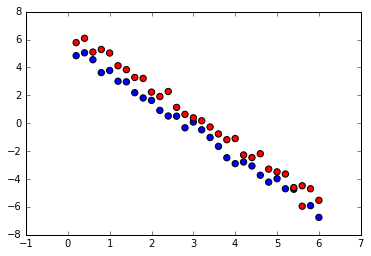

In [516]:
colormap = np.array(['b','b' ,'r'])
plt.scatter(d[0], d[1], c=colormap[label], s=40)

In [517]:
data = np.array(df.iloc[:,:-1])

In [518]:
net = Perceptron(n_iter=1000, verbose=0, random_state=None, fit_intercept=True, eta0=0.002)
net.fit(data,label)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.002, fit_intercept=True,
      n_iter=1000, n_jobs=1, penalty=None, random_state=None, shuffle=True,
      verbose=0, warm_start=False)

In [519]:
net.score(data,label)

0.90000000000000002

In [407]:
net.coef_[0]

array([-0.07      , -0.03668283])

Coefficient 0 -0.07
Coefficient 1 -0.036682827266
Bias [ 0.222]


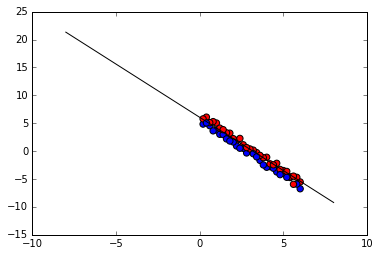

In [412]:
# Plot the original data
plt.scatter(d[0], d[1], c=colormap[label], s=40)
 
# Output the values
print "Coefficient 0 " + str(net.coef_[0,0])
print "Coefficient 1 " + str(net.coef_[0,1])
print "Bias " + str(net.intercept_)
 
# Calc the hyperplane (decision boundary)
ymin, ymax = plt.ylim()
w = net.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(ymin, ymax)
yy = a * xx - (net.intercept_[0]) / w[1]
 
# Plot the line
plt.plot(xx,yy, 'k-')

In [409]:
print xx.shape

(50L,)


In [8]:
def disagrement(x1,y1,x2,y2,w,N):
    dataSet = np.zeros(shape=(N,3))
    labelSet = np.zeros(shape=(N,1))
    for i in xrange(N):
        x = random.uniform(-1,1)
        y = random.uniform(-1,1)
        dataSet[i] = [1,x,y]
        labelSet[i] = targetFunction(x1,y1,x2,y2,x,y)
    predictedLabel = np.sign(np.dot(dataSet, np.transpose(w)))
    E_out = sum([a!=b for a,b in zip(predictedLabel, labelSet)])/float(len(predictedLabel))
    return E_out

In [53]:
def main(N):
    final_counter = 0
    final_disagrement = 0
    for i in xrange(1000):
        trainSet, labelSet,x1,y1,x2,y2 = trainingSet(N)
        E_in, counter, w =  PLA(trainSet, labelSet, 1000)
        final_counter += counter
        final_disagrement += disagrement(x1,y1,x2,y2,w,10000)
    print "Counter = ", final_counter/1000
    print "Disagrement = ", final_disagrement/1000   

Create data frame

In [511]:
df = pd.read_csv('A et B.txt', sep=' ', header=None)
df.columns = ['x','y','Value']
df.head()

,x,y,Value
0,"0,2","4,839161656",A
1,"0,4","5,043697771",A
2,"0,6","4,548758355",A
3,"0,8","3,626296189",A
4,1,"3,777023723",A


In [512]:
def str_to_float(df): 
    new_df = df.copy()
    return new_df.applymap(lambda x: float(x.replace(',','.')))

In [513]:
def binary_code(df): #1 for A, -1 for B
    new_df = df.copy()
    return new_df.apply(lambda x: 1 if x == 'A' else -1)

In [514]:
first_2_col = str_to_float(df.iloc[:,:-1])
value_col = binary_code(df.iloc[:,-1])
df.iloc[:,:-1] = first_2_col
df.iloc[:,-1] = value_col

In [437]:
df.head()

,x,y,Value
0,0.2,4.83916,1
1,0.4,5.0437,1
2,0.6,4.54876,1
3,0.8,3.6263,1
4,1,3.77702,1


In [438]:
np.array(df.iloc[:,-1])

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [439]:
df = df.iloc[np.random.permutation(len(df))].reset_index(drop=True)

In [440]:
df.head()

,x,y,Value
0,5.6,-4.48501,-1
1,2.2,1.91324,-1
2,3,0.384252,-1
3,1.8,3.21041,-1
4,3.6,-1.66041,1


In [441]:
df['bias'] = [0] * df.shape[0]
df.head()

,x,y,Value,bias
0,5.6,-4.48501,-1,0
1,2.2,1.91324,-1,0
2,3,0.384252,-1,0
3,1.8,3.21041,-1,0
4,3.6,-1.66041,1,0


In [464]:
t = df.columns.tolist()[:-2]

In [465]:
t

['x', 'y']

In [466]:
t.extend([df.columns[-1],df.columns[-2]])

In [467]:
t

['x', 'y', 'bias', 'Value']